In [2]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from denoising_assessment_project.utils import metric_compute, stats_compute, stats_plot

from denoising_assessment_project.global_vars import global_vars

%matplotlib notebook

In [26]:
global_vars.init()

In [27]:
# -PARAMETERS FOR GENERATION-
# image dimensions
#global_vars.image_dimensions = torch.Size([256,256])
# reps in a series 
#global_vars.series_size = 5
#global_vars.blobs_population_sizes = torch.arange(3,300,15)
#global_vars.peak_values = torch.arange(10,1000,50)

# VARIED BACKGROUND BY MIMICKING LASER BEAM:
# image dimensions
global_vars.image_dimensions = torch.Size([256,256])

# reps in a series
global_vars.series_size = 50

#global_vars.blobs_population_sizes = torch.arange(3,300,15)
#global_vars.peak_values = torch.arange(10,1000,50)

# alternative - zoom: 
#global_vars.blobs_population_sizes = torch.arange(3,300,15)
#global_vars.peak_values = torch.arange(10,210,10)


# zoom zoom: 
global_vars.blobs_population_sizes = torch.arange(148,301,8)
global_vars.peak_values = torch.arange(86,201,6)

In [28]:
print(global_vars.blobs_population_sizes.shape)
print(global_vars.peak_values.shape)

print(global_vars.blobs_population_sizes)
print(global_vars.peak_values)

torch.Size([20])
torch.Size([20])
tensor([148, 156, 164, 172, 180, 188, 196, 204, 212, 220, 228, 236, 244, 252,
        260, 268, 276, 284, 292, 300])
tensor([ 86,  92,  98, 104, 110, 116, 122, 128, 134, 140, 146, 152, 158, 164,
        170, 176, 182, 188, 194, 200])


In [3]:
print(torch.arange(10,210,10))
print(torch.arange(3,300,15))

tensor([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
        150, 160, 170, 180, 190, 200])
tensor([  3,  18,  33,  48,  63,  78,  93, 108, 123, 138, 153, 168, 183, 198,
        213, 228, 243, 258, 273, 288])


<IPython.core.display.Javascript object>


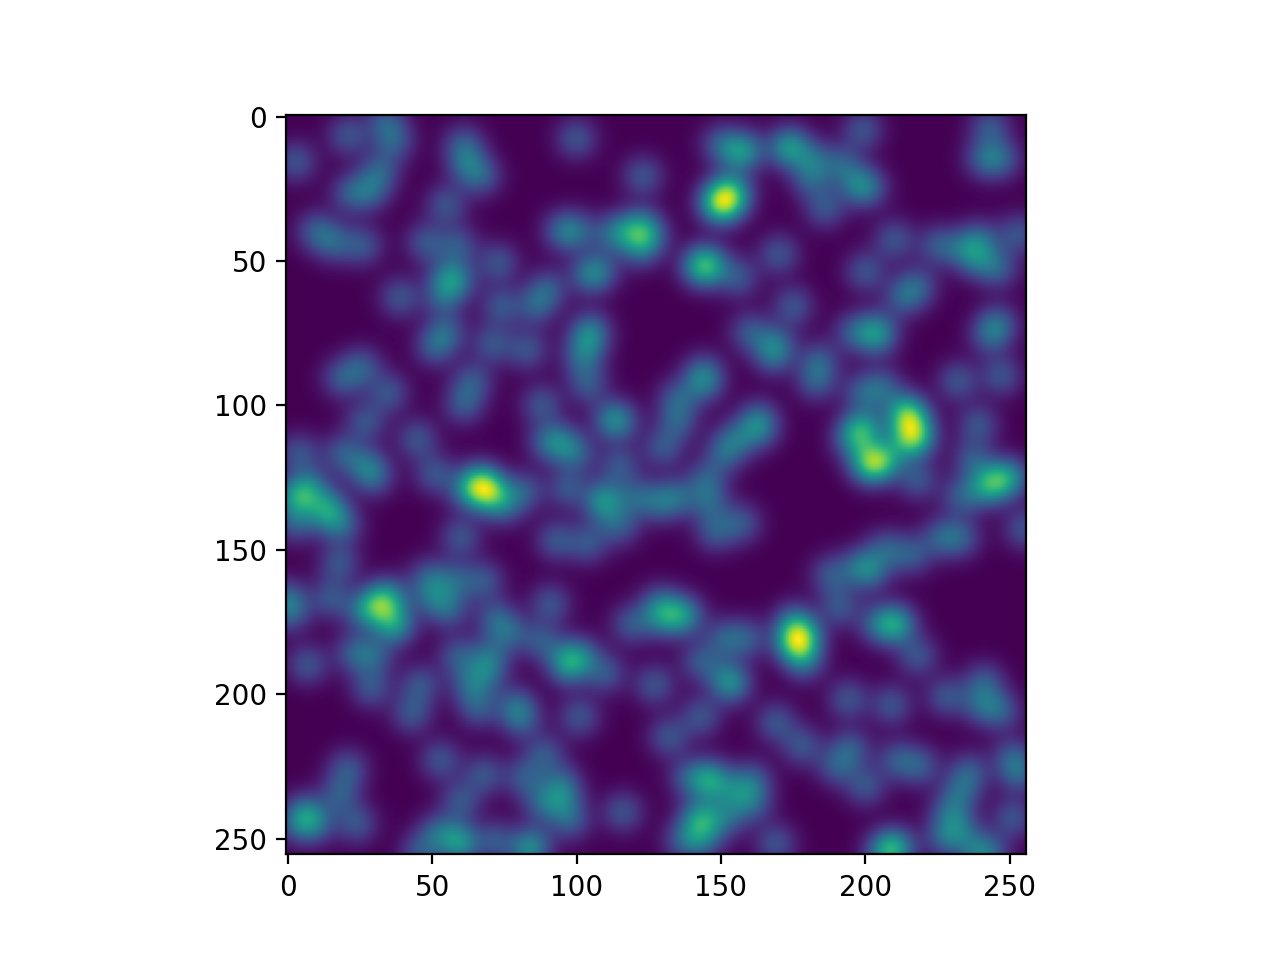

torch.Size([20, 50, 256, 256])
tensor(5.9354e-29)
tensor(5.6697)


In [29]:
# -IMAGES GENERATION-

# 1. Generating n sets of randomly located blobs for varying quantities of blobs 
# (n = len(blobs_population_sizes))
# dims=[n, reps, img_x, img_y]
distinct_blob_quantities_eval_beam_zoom_zoom = data_gen_default.varying_blob_quantities_img_series_generate(global_vars.series_size, global_vars.blobs_population_sizes, global_vars.image_dimensions)
# tests 
print(distinct_blob_quantities_eval_beam_zoom_zoom.shape)
print(distinct_blob_quantities_eval_beam_zoom_zoom.min())
print(distinct_blob_quantities_eval_beam_zoom_zoom.max())

# 2. Generating m sets of images with different peak values and applying poisson noise to them 
# (m = len(peak_values))
# dims=[2, m, n, reps, img_x, img_y]
# 2a. 
distinct_peaks_and_blob_quantities_eval_beam_zoom_zoom = data_gen.varying_peak_values_apply(distinct_blob_quantities_eval_beam_zoom_zoom, global_vars.peak_values)
# 2b.
un_noised_images_eval_beam_zoom_zoom = data_gen.background_offset_apply(distinct_peaks_and_blob_quantities_eval_beam_zoom_zoom, 10)
# 2c.
un_noised_images_eval_beam_zoom_zoom = data_gen.gaussian_beam_apply(un_noised_images_eval_beam_zoom_zoom)
# 2d.
noised_images_eval_beam_zoom_zoom = data_gen.noise_apply(un_noised_images_eval_beam_zoom_zoom)

In [30]:
# 3. Generating indices for m peak values and n blob quantities reflective of the arragngement of the n x m sets 
# dims=[2, m, n]
indices_eval_zoom_zoom = data_gen_default.indices_generate(noised_images_eval_beam_zoom_zoom)

In [32]:
noised_images_eval_beam_zoom_zoom_pickled = pickle.dump(noised_images_eval_beam_zoom_zoom, open("/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/noised_images_eval_beam_zoom_zoom.pkl", 'wb'), protocol=4)
%store noised_images_eval_beam_zoom_zoom_pickled

un_noised_images_eval_beam_zoom_zoom_pickled = pickle.dump(un_noised_images_eval_beam_zoom_zoom, open("/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/un_noised_images_eval_beam_zoom_zoom.pkl", 'wb'), protocol=4)
%store un_noised_images_eval_beam_zoom_zoom_pickled

%store indices_eval_zoom_zoom

Stored 'noised_images_eval_beam_zoom_zoom_pickled' (NoneType)
Stored 'un_noised_images_eval_beam_zoom_zoom_pickled' (NoneType)
Stored 'indices_eval_zoom_zoom' (Tensor)


In [33]:
print(noised_images_eval_beam_zoom_zoom.shape)
print(un_noised_images_eval_beam_zoom_zoom.shape)

torch.Size([20, 20, 50, 256, 256])
torch.Size([20, 20, 50, 256, 256])


In [34]:
import os
from tifffile import imwrite

for n in range(noised_images_eval_beam_zoom_zoom.shape[0]):
    for m in range(noised_images_eval_beam_zoom_zoom.shape[1]):
        for i in range(noised_images_eval_beam_zoom_zoom.shape[2]):
            print('n datatype:', type(n))
            print('m datatype:', type(m))
            print('i datatype:', type(i))
            im = np.asarray(noised_images_eval_beam_zoom_zoom[n,m,i,:,:].numpy().astype(np.single))
            
            if n > 99:
                print('warning n')
            if m > 99:
                print('warning m')
            if i > 99:
                print('warning i')
            
            if n in range(0,10):
                n = '0{}'.format(n)
            if m in range(0,10):
                m = '0{}'.format(m)
            if i in range(0,10):
                i = '0{}'.format(i)
            
            savepath = '/Users/miriamczech/Desktop/denoising_assessment/tiffed_data_beam/EVAL_zoom_zoom/noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)
            
            n = int(n)
            m = int(m)
            i = int(i)

            savename = os.path.join(savepath, filename)
            
            #photometric='minisblack'
            imwrite(savename, im)

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

In [35]:
import os
from tifffile import imwrite

for n in range(un_noised_images_eval_beam_zoom_zoom.shape[0]):
    for m in range(un_noised_images_eval_beam_zoom_zoom.shape[1]):
        for i in range(un_noised_images_eval_beam_zoom_zoom.shape[2]):
            print('n datatype:', type(n))
            print('m datatype:', type(m))
            print('i datatype:', type(i))
            im = np.asarray(un_noised_images_eval_beam_zoom_zoom[n,m,i,:,:].numpy().astype(np.single))
            
            if n > 99:
                print('warning n')
            if m > 99:
                print('warning m')
            if i > 99:
                print('warning i')
            
            if n in range(0,10):
                n = '0{}'.format(n)
            if m in range(0,10):
                m = '0{}'.format(m)
            if i in range(0,10):
                i = '0{}'.format(i)
            
            savepath = '/Users/miriamczech/Desktop/denoising_assessment/tiffed_data_beam/EVAL_zoom_zoom/un_noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)
            
            n = int(n)
            m = int(m)
            i = int(i)

            savename = os.path.join(savepath, filename)
            
            #photometric='minisblack'
            imwrite(savename, im)

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: 

n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>
n datatype: <class 'int'>
m datatype: <class 'int'>
i datatype: <class 'int'>


In [22]:
# saving noised data generated for running CARE prediction as tiffs 

import os
from tifffile import imwrite

for n in range(noised_images_eval_beam_zoom_zoom.shape[0]):
    for m in range(noised_images_eval_beam_zoom_zoom.shape[1]):
        for i in range(noised_images_eval_beam_zoom_zoom.shape[2]):
            savepath = '/Users/miriamczech/Desktop/denoising_assessment/tiffed_data_beam/EVAL_zoom_zoom/noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)

            savename = os.path.join(savepath, filename)
            im = np.asarray(noised_images_eval_beam_zoom_zoom[n,m,i,:,:].numpy().astype(np.single))
            
            imwrite(savename, im)
            
            if n==19 and m==19 and i==49:
                print('DONE')

DONE


In [23]:
# saving noised data generated for running CARE prediction as tiffs 

import os
from tifffile import imwrite

for n in range(un_noised_images_eval_beam_zoom_zoom.shape[0]):
    for m in range(un_noised_images_eval_beam_zoom_zoom.shape[1]):
        for i in range(un_noised_images_eval_beam_zoom_zoom.shape[2]):
            savepath = '/Users/miriamczech/Desktop/denoising_assessment/tiffed_data_beam/EVAL_zoom_zoom/un_noised'
            filename = '{}_{}_{}.tif'.format(n,m,i)

            savename = os.path.join(savepath, filename)
            im = np.asarray(un_noised_images_eval_beam_zoom_zoom[n,m,i,:,:].numpy().astype(np.single))
            
            imwrite(savename, im)
            
            if n==19 and m==19 and i==49:
                print('DONE')

DONE
